In [6]:
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Loading the model

Loading VGG19, stripping the last 3 layers and max-pooling the features to give 512 outputs.

In [37]:
model = keras.applications.vgg19.VGG19(include_top=False,
                                       weights='imagenet',
                                       input_tensor=None,
                                       input_shape=(224, 224, 3),
                                       pooling='max')


## Creating some images

In [8]:
image = np.zeros((3, 224, 224))

In [11]:
image.shape

(3, 224, 224)

In [12]:
from PIL import Image, ImageDraw

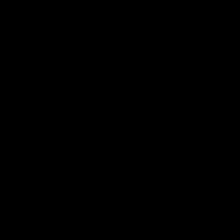

In [13]:
im = Image.new('RGB', (224, 224))
im

In [14]:
draw = ImageDraw.Draw(im)

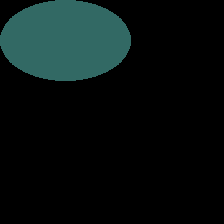

In [15]:
draw.ellipse([0, 0, 130, 80],
             (50,105,100))
im

In [16]:
a = np.random.randint(0, 10, (6,7))

In [17]:
a

array([[9, 4, 3, 8, 8, 3, 8],
       [8, 3, 5, 5, 9, 8, 9],
       [1, 2, 9, 1, 7, 7, 5],
       [9, 1, 7, 0, 0, 3, 1],
       [8, 2, 7, 5, 5, 6, 4],
       [6, 9, 7, 4, 5, 8, 2]])

In [18]:
a[np.argsort(a[:, 1])]

array([[9, 1, 7, 0, 0, 3, 1],
       [1, 2, 9, 1, 7, 7, 5],
       [8, 2, 7, 5, 5, 6, 4],
       [8, 3, 5, 5, 9, 8, 9],
       [9, 4, 3, 8, 8, 3, 8],
       [6, 9, 7, 4, 5, 8, 2]])

## A picture of a cat

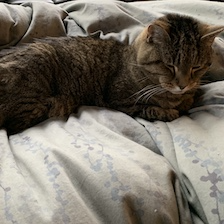

In [39]:
ali = Image.open("ali.png")
ali

In [34]:
aliarray = np.array(ali)[None, :, :, 0:3]

In [38]:
model.predict(aliarray).shape

(1, 512)

## Testing the code

In [292]:
from figure import Figure, Population

In [282]:
f = Figure()

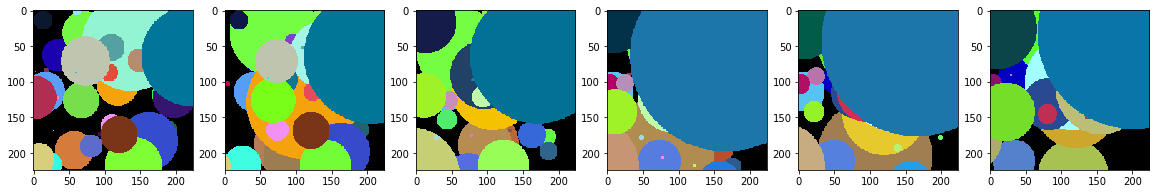

In [283]:
images = [f.draw()]
for i in range(5):
    f = f.clone_and_mutate()
    images.append(f.draw())

fig, axs = plt.subplots(1, len(images), figsize=(20, 4))
for image, ax in zip(images, axs.flatten()):
    ax.imshow(image)

In [284]:
np.cos

<ufunc 'cos'>

In [285]:
f.transform(model)

array([ 1.51115580e+01,  1.41606712e+01,  1.66493263e+01,  1.47029190e+02,
        6.34582567e+00,  1.62968216e+01,  1.01833761e+00,  1.50361814e+01,
       -0.00000000e+00, -0.00000000e+00,  6.50015717e+01, -0.00000000e+00,
        1.24589939e+01,  8.43277836e+00,  4.05497360e+01,  1.38165731e+01,
        2.77802620e+01, -0.00000000e+00,  1.02318707e+01,  3.96287003e+01,
       -0.00000000e+00,  3.19913559e+01,  5.41707268e+01,  4.06701517e+00,
       -0.00000000e+00,  1.25578850e+02,  4.64834824e+01,  1.74210876e+02,
        4.77799187e+01, -0.00000000e+00,  3.12303638e+00, -0.00000000e+00,
        2.05418549e+01, -0.00000000e+00,  1.32057323e+01,  2.00792789e+01,
        3.01302032e+01,  5.49538651e+01,  2.36473866e+01, -0.00000000e+00,
        1.42779922e+01,  5.52580910e+01,  2.04938126e+01,  4.59263458e+01,
        2.41918762e+02,  1.11797508e+02,  3.74491920e+01,  1.07440014e+01,
       -0.00000000e+00,  2.38289986e+01,  1.77651806e+01, -0.00000000e+00,
        2.98742175e+00,  

We'll create a `target` array based on the picture of Ali for later use.

In [286]:
target = model.predict(aliarray).flatten()
target /= np.linalg.norm(target)
target @ target

1.0

In [287]:
f.score(model, target)

0.347668

In [389]:
p = Population()

In [391]:
for _ in range(5):
    p.score_and_sort(model, target)
    print(p.figures[0].score(model, target), p.figures[49].score(model, target))
    p.purge_and_mutate()

..................................................[-0.46922722, -0.40965882, -0.40277237, -0.39884776, -0.38866135, -0.38595295, -0.3848616, -0.38086078, -0.38039285, -0.37648702, -0.3743128, -0.37349114, -0.37303907, -0.36901018, -0.36741215, -0.367174, -0.36598197, -0.3642602, -0.36242473, -0.36165473, -0.35875556, -0.35511503, -0.35367504, -0.35291937, -0.35258207, -0.35147697, -0.34936902, -0.34133562, -0.3399102, -0.33974674, -0.33801618, -0.3370657, -0.3357105, -0.33336258, -0.3309684, -0.330307, -0.3280664, -0.32736844, -0.326907, -0.3266921, -0.3237041, -0.32294294, -0.32075354, -0.3189705, -0.31053576, -0.30934575, -0.30858243, -0.30791715, -0.30084023, -0.27683702]
0.46922722 0.27683702
..................................................[-0.46922722, -0.40965882, -0.40329945, -0.40277237, -0.39884776, -0.39457136, -0.39254546, -0.38866135, -0.38595295, -0.3848616, -0.38331252, -0.38154826, -0.38086078, -0.38039285, -0.3788435, -0.37648702, -0.3743128, -0.37349114, -0.37303907,

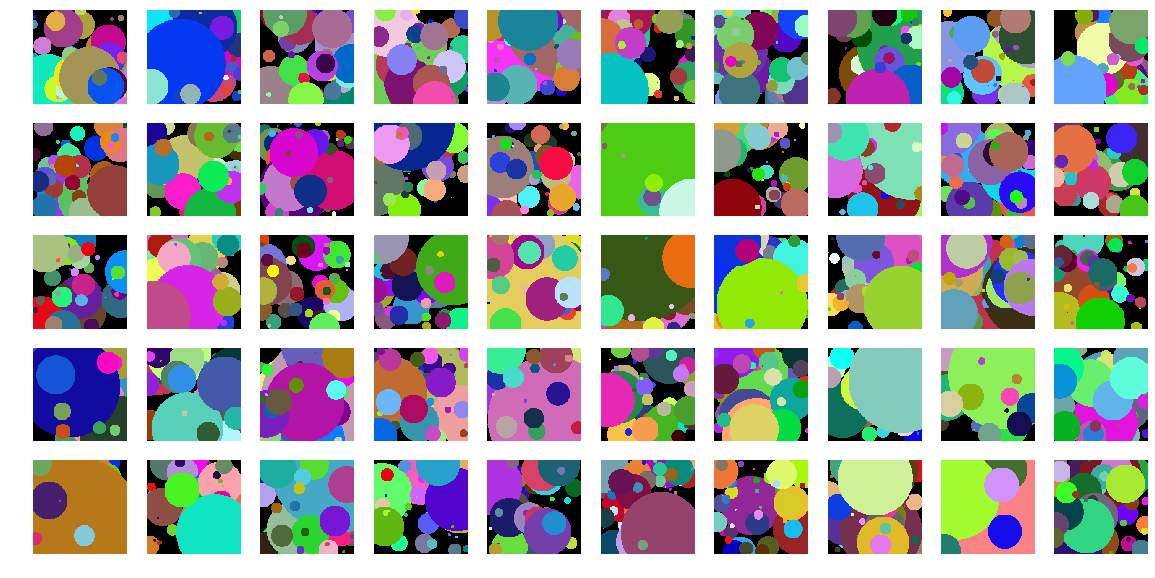

In [390]:
figures = p.figures
fig, axs = plt.subplots(5, 10, figsize=(20, 10))
for figure, ax in zip(figures, axs.flatten()):
    ax.imshow(figure.draw())
    ax.axis('off')

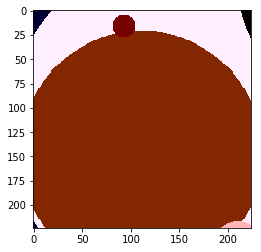

In [388]:
plt.imshow(p.figures[0].draw())